In [1]:
# Technology has been increasing drastically over the years, and accordingly the impact of technology in movies majorly in the
# genres like animation and sci-fi has been increasing. 

# Hypothesis : over the years, the avg rating of the animation and sci-fi movies is increasing

#steps followed:
#1) data cleaning: movies: a) split the genres column separeated by "\" and create rows for each genre movie belongs to 
#                          b) extract release years from the title column and drop rows without release year 
#2) data integration:      a) integrating data from datasets movies, links, ratings, tags
#3) analysis : found the avg rating given to each genre in each year and plotted line plot reflecting the trend of avg(rating)
# over the given time period. 

# conclusion: though the number of movies in animation and sci-fi genres increased, the avg(rating) of these genre of films has 
# been increased untill 1990 and became stagnant thereafter.


In [2]:
# import required libraries 

import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

In [3]:
# import .csv datafiles

movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

In [4]:
# get familiar with data

print(movies.info())
print(movies.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB
None
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [5]:
# split and creat separate rows for each genre the film belongs to

s_movies = pd.DataFrame(movies.genres.str.split('|').tolist(), index= movies.movieId).stack()
s_movies = s_movies.reset_index([0, 'movieId'])
s_movies.columns = ['movieId', 'geners_stack']
movies = pd.merge(s_movies,movies, on = 'movieId').drop(["genres"], axis = 1)


In [6]:
# extract the release year from the title and drop the rows without release year

movies['title'] = movies['title'].str.strip()
movies['release_year'] = movies['title'].str[-5:-1]
movies = movies[movies['release_year'].str.isnumeric() == True]

In [7]:
print(links.info())
print(links.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
imdbId     9742 non-null int64
tmdbId     9734 non-null float64
dtypes: float64(1), int64(2)
memory usage: 228.4 KB
None
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [8]:
print(ratings.info())
print(ratings.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [9]:
print(tags.info())
print(tags.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
userId       3683 non-null int64
movieId      3683 non-null int64
tag          3683 non-null object
timestamp    3683 non-null int64
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [10]:
# combine movies, links, ratings, tags dataframes 

df1 = pd.merge(movies,links,on = ["movieId"],how = 'left')
df = pd.merge(df1,ratings, on = ["movieId"], how = 'left')


In [13]:
# group by release year and genre to find the mean of rating and count of movies
total = df.groupby(['release_year','geners_stack']).agg({'rating': 'mean','movieId': 'nunique'}).reset_index().rename(columns={'movieId':'movie_count'})

In [14]:
# to find the % division of movies each year based on geners
movie_count_data = df.groupby(['release_year','geners_stack']).agg({'movieId': 'nunique'})
movie_pct_data = movie_count_data.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
movie_pct_data = movie_pct_data.reset_index().rename(columns={'movieId':'movie_pct'})

In [15]:
movie_pct_data.head()

,release_year,geners_stack,movie_pct
0,1902,Action,25.0
1,1902,Adventure,25.0
2,1902,Fantasy,25.0
3,1902,Sci-Fi,25.0
4,1903,Crime,50.0


In [16]:
# final dataset merging all the aggregations
data_agg = total.merge(movie_pct_data, on = ['release_year','geners_stack'])

In [17]:
data_agg.sort_values(by=['release_year']).head()

,release_year,geners_stack,rating,movie_count,movie_pct
0,1902,Action,3.5,1,25.0
1,1902,Adventure,3.5,1,25.0
2,1902,Fantasy,3.5,1,25.0
3,1902,Sci-Fi,3.5,1,25.0
4,1903,Crime,2.5,1,50.0


In [18]:
# fiter records for animation and sci-fi
final_data = data_agg[data_agg['geners_stack'].isin(['Sci-Fi','Animation'])]

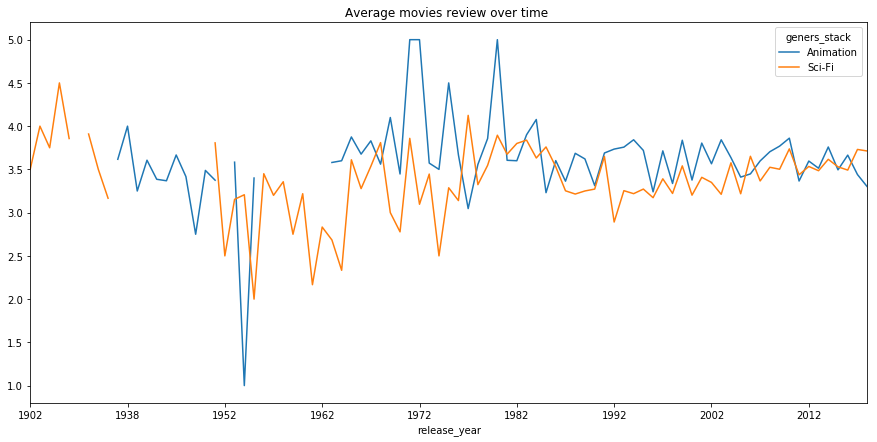

In [19]:
# line plot showing avg movie review trends

fig, ax = plt.subplots(figsize=(15,7))
final_data.groupby(['release_year','geners_stack']).mean()['rating'].unstack().plot(ax=ax, title = 'Average movies review over time ')

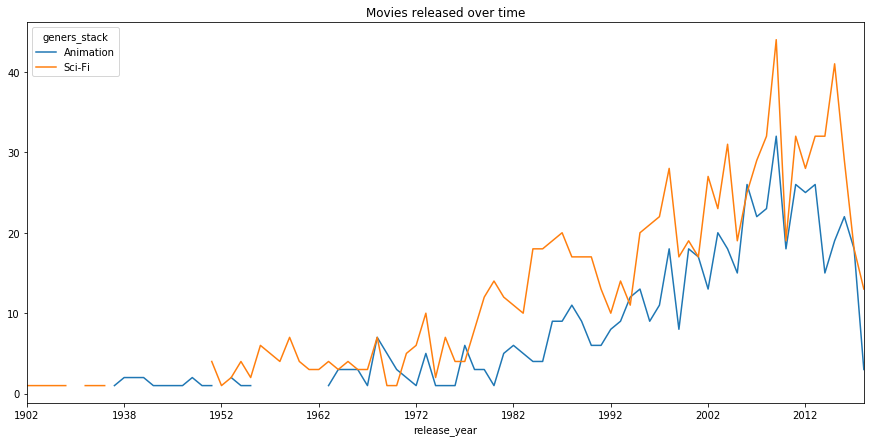

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
final_data.groupby(['release_year','geners_stack']).sum()['movie_count'].unstack().plot(ax=ax,title = 'Movies released over time')

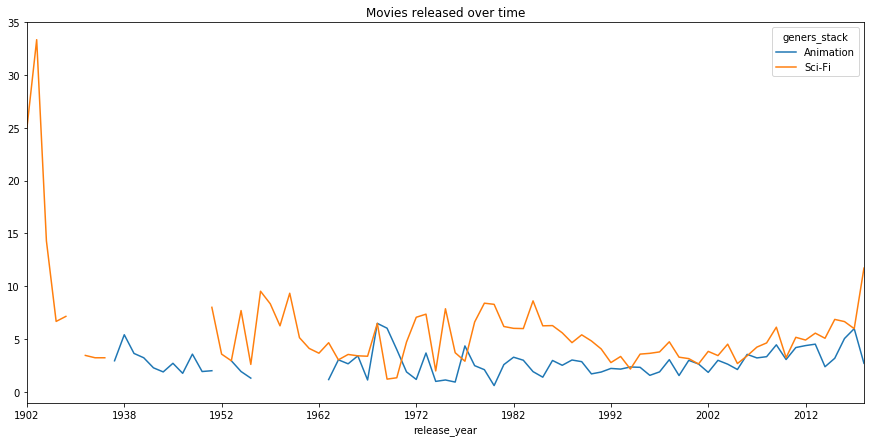

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
final_data.groupby(['release_year','geners_stack']).mean()['movie_pct'].unstack().plot(ax=ax,title = 'Movies released over time')